<a href="https://colab.research.google.com/github/kuprel/min-dalle/blob/main/min_dalle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# min(DALL·E)

### Download models and install dependencies

In [ ]:
! git clone https://github.com/kuprel/min-dalle
! mkdir -p /content/min-dalle/pretrained/vqgan/
! curl https://huggingface.co/dalle-mini/vqgan_imagenet_f16_16384/resolve/main/flax_model.msgpack -L --output /content/min-dalle/pretrained/vqgan/flax_model.msgpack
! pip install torch flax==0.4.2 wandb
! wandb login --anonymously
! wandb artifact get --root=/content/min-dalle/pretrained/dalle_bart_mini dalle-mini/dalle-mini/mini-1:v0
! wandb artifact get --root=/content/min-dalle/pretrained/dalle_bart_mega dalle-mini/dalle-mini/mega-1-fp16:v14


### Load Model

In [14]:
import os
os.chdir('/content/min-dalle')
from min_dalle.min_dalle_torch import MinDalleTorch
from min_dalle.min_dalle_flax import MinDalleFlax

mega = False #@param {type:"boolean"}
torch = True #@param {type:"boolean"}

model = MinDalleTorch(mega) if torch else MinDalleFlax(mega)


reading files from pretrained/dalle_bart_mini
initializing MinDalleTorch
loading encoder
loading decoder


### Generate an Image

tokenizing text
['Ġartificial']
['Ġintelligence']
text tokens [0, 6316, 7815, 2]
encoding text tokens
sampling image tokens
detokenizing image


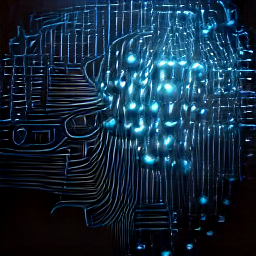

In [15]:
text = "artificial intelligence" #@param {type:"string"}
seed = 0 #@param {type:"integer"}

image = model.generate_image(text, seed)
display(image)